[1] "IncidntNum" "Category"   "Descript"   "DayOfWeek"  "Date"      
 [6] "Time"       "PdDistrict" "Resolution" "Address"    "X"         
[11] "Y"          "Location"   "PdId"

'data.frame':	28993 obs. of  13 variables:
 $ IncidntNum: int  140734311 140736317 146177923 146177531 140734220 140734349 140734349 140734349 140738147 140734258 ...
 $ Category  : Factor w/ 34 levels "ARSON","ASSAULT",..: 1 20 16 16 20 7 7 6 21 30 ...
 $ Descript  : Factor w/ 368 levels "ABANDONMENT OF CHILD",..: 15 179 143 143 132 247 239 93 107 347 ...
 $ DayOfWeek : Factor w/ 7 levels "Friday","Monday",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Date      : Factor w/ 92 levels "06/01/2014","06/02/2014",..: 92 92 92 92 92 92 92 92 92 92 ...
 $ Time      : Factor w/ 1379 levels "00:01","00:02",..: 1370 1365 1351 1351 1344 1334 1334 1334 1321 1321 ...
 $ PdDistrict: Factor w/ 10 levels "BAYVIEW","CENTRAL",..: 1 4 8 7 7 8 8 8 3 2 ...
 $ Resolution: Factor w/ 16 levels "ARREST, BOOKED",..: 12 12 12 12 12 1 1 1 12 2 ...
 $ Address   : Factor w/ 8055 levels "0 Block of 10TH ST",..: 6843 4022 1098 6111 5096 1263 1263 1263 1575 5236 ...
 $ X         : num  -122 -122 -122 -122 -123 ...
 $ Y         : nu

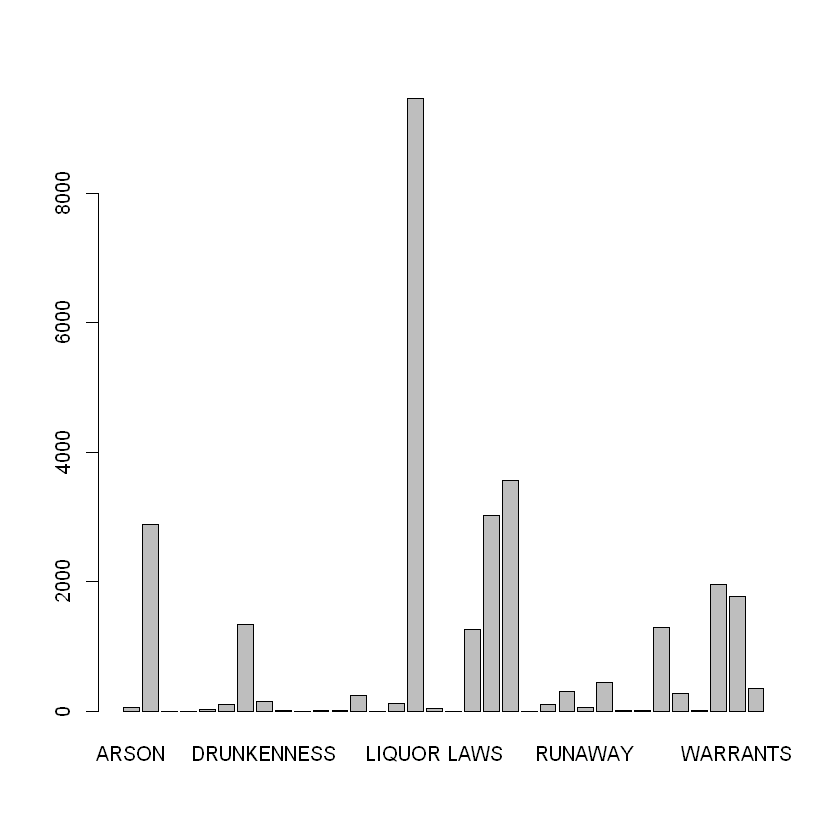

In [4]:
#setwd("E:/MEGA/Git Repository/datasci_course_materials/assignment6")        
crisf <- read.csv("sanfrancisco_incidents_summer_2014.csv", header = T)     

names(crisf)
 str(crisf)
options(jupyter.plot_mimetypes = 'image/png')
plot(crisf$Category)